In [ ]:
import pyccl as ccl
import matplotlib.pyplot as plt
import numpy as np

In [57]:
hmf_despali = ccl.halos.MassFuncDespali16( mass_def='200m' )
hmf_bocquet = ccl.halos.MassFuncBocquet16( mass_def='200m' )
hmf_tinker08 = ccl.halos.MassFuncTinker08( mass_def='200m' )
hmf_tinker10 = ccl.halos.MassFuncTinker10( mass_def='200m' )

In [58]:
Om0 = 0.3
Omega_b = 0.05
sigma8 = 0.8
w0 = -1
wa = 0
h = 0.7

In [59]:
cosmo_params = {
                'Omega_c': Om0 - Omega_b, 
                'Omega_b': Omega_b,
                'h': h,    
                'n_s': 0.96,
                'sigma8': sigma8,   
                'Omega_k': 0.0 ,
                'matter_power_spectrum' : 'linear',
                'transfer_function':'boltzmann_camb',
                'w0': w0,
                'wa': wa,
                'extra_parameters':{"camb": {"dark_energy_model": "ppf"}}
            }

# Create the CCL Cosmology object once
cosmo = ccl.Cosmology( **cosmo_params )

In [73]:
Ms = 10**np.arange( 12.5 , 15 , 0.1 )

In [74]:
z = 0.3
Mstar = 10**13.8
s = 0.037
q = 1.008
dndlog10m_despali = hmf_despali( cosmo, Ms, 1/( 1 + z ) )
dndlog10m_bocquet = hmf_bocquet( cosmo, Ms, 1/( 1 + z ) )
dndlog10m_tinker08 = hmf_tinker08( cosmo, Ms, 1/( 1 + z ) )
dndlog10m_tinker08_corrected = hmf_tinker08( cosmo, Ms, 1/( 1 + z ) ) * ( s * np.log10( Ms / Mstar ) + q )
dndlog10m_tinker10 = hmf_tinker10( cosmo, Ms, 1/( 1 + z ) )

In [78]:
s = 0.037 + 2 * 0.021
q = 1.008 + 2 * 0.035
dndlog10m_tinker08_corrected_up = hmf_tinker08( cosmo, Ms, 1/( 1 + z ) ) * ( s * np.log10( Ms / Mstar ) + q )

s = 0.037 - 2 * 0.021
q = 1.008 - 2 * 0.035
dndlog10m_tinker08_corrected_lo = hmf_tinker08( cosmo, Ms, 1/( 1 + z ) ) * ( s * np.log10( Ms / Mstar ) + q )

s = 0.037 - 2 * 0.021
q = 1.008 + 2 * 0.035
dndlog10m_tinker08_corrected_loup = hmf_tinker08( cosmo, Ms, 1/( 1 + z ) ) * ( s * np.log10( Ms / Mstar ) + q )

s = 0.037 + 2 * 0.021
q = 1.008 - 2 * 0.035
dndlog10m_tinker08_corrected_uplo = hmf_tinker08( cosmo, Ms, 1/( 1 + z ) ) * ( s * np.log10( Ms / Mstar ) + q )

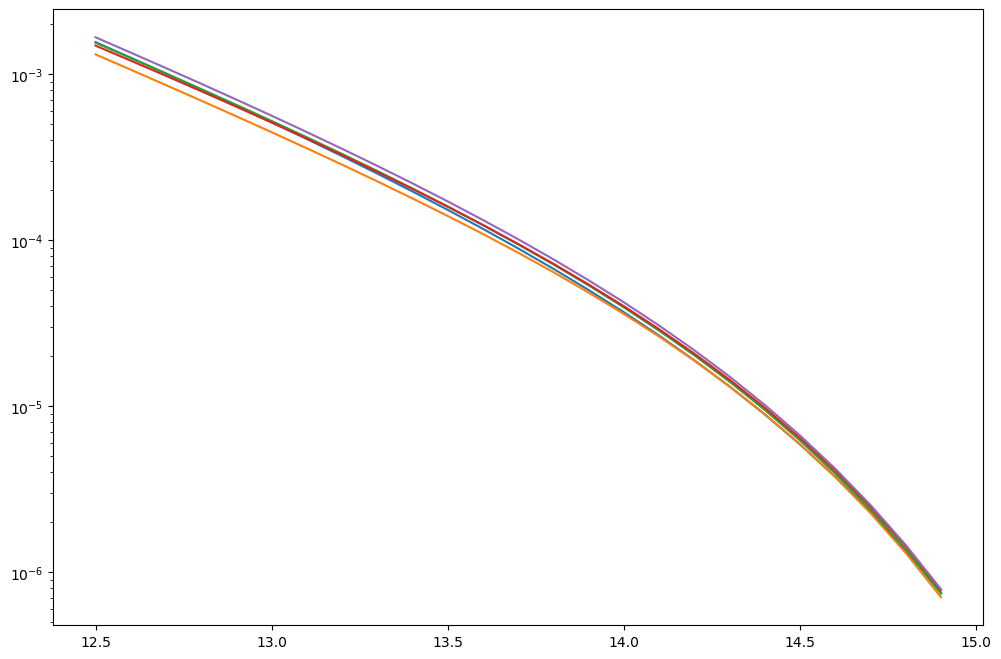

In [76]:
plt.figure( figsize = ( 12 , 8 ) )
plt.plot( np.log10( Ms ) , dndlog10m_despali )
plt.plot( np.log10( Ms ) , dndlog10m_bocquet )
plt.plot( np.log10( Ms ) , dndlog10m_tinker08 )
plt.plot( np.log10( Ms ) , dndlog10m_tinker08_corrected )
plt.plot( np.log10( Ms ) , dndlog10m_tinker10 )
plt.yscale('log')

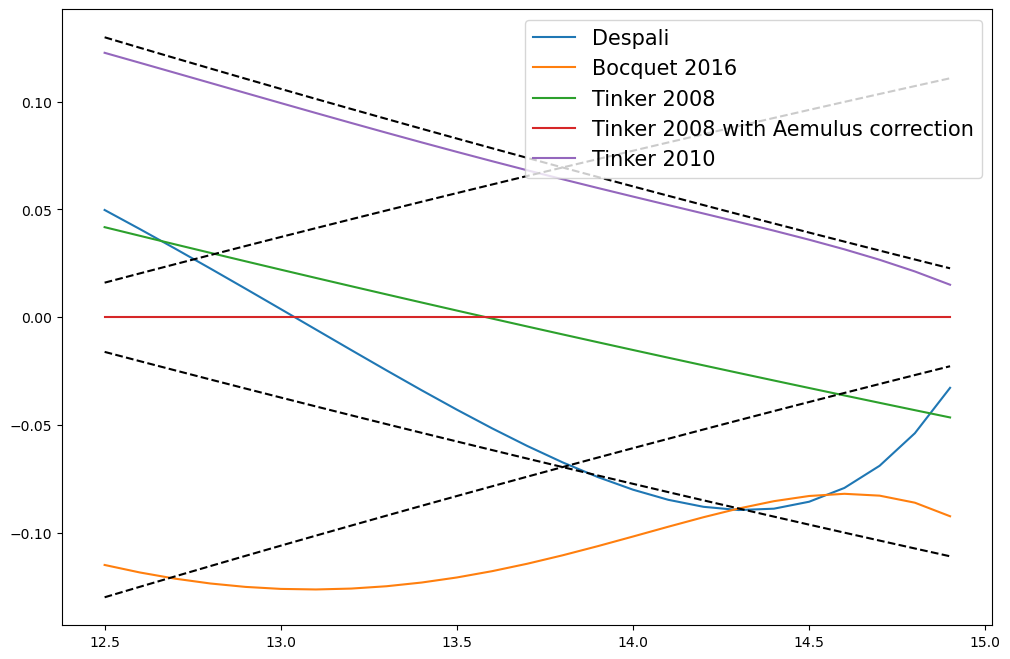

In [79]:
plt.figure( figsize = ( 12 , 8 ) )
plt.plot( np.log10( Ms ) , ( dndlog10m_despali - dndlog10m_tinker08_corrected ) / dndlog10m_tinker08_corrected , label = 'Despali')
plt.plot( np.log10( Ms ) , ( dndlog10m_bocquet - dndlog10m_tinker08_corrected ) / dndlog10m_tinker08_corrected , label = 'Bocquet 2016')
plt.plot( np.log10( Ms ) , ( dndlog10m_tinker08 - dndlog10m_tinker08_corrected ) / dndlog10m_tinker08_corrected , label = 'Tinker 2008')
plt.plot( np.log10( Ms ) , ( dndlog10m_tinker08_corrected - dndlog10m_tinker08_corrected ) / dndlog10m_tinker08_corrected , label = 'Tinker 2008 with Aemulus correction')
plt.plot( np.log10( Ms ) , ( dndlog10m_tinker10 - dndlog10m_tinker08_corrected ) / dndlog10m_tinker08_corrected , label = 'Tinker 2010')
# plt.yscale('log')
plt.legend( fontsize = 15 )

plt.plot( np.log10( Ms ) , ( dndlog10m_tinker08_corrected_lo - dndlog10m_tinker08_corrected ) / dndlog10m_tinker08_corrected , 'k--' )
plt.plot( np.log10( Ms ) , ( dndlog10m_tinker08_corrected_up - dndlog10m_tinker08_corrected ) / dndlog10m_tinker08_corrected , 'k--' )
plt.plot( np.log10( Ms ) , ( dndlog10m_tinker08_corrected_loup - dndlog10m_tinker08_corrected ) / dndlog10m_tinker08_corrected , 'k--' )
plt.plot( np.log10( Ms ) , ( dndlog10m_tinker08_corrected_uplo - dndlog10m_tinker08_corrected ) / dndlog10m_tinker08_corrected , 'k--' )
